# K Nearest Neighbors

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=ngLyX54e1LU&list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E&index=1

## Concept

A sample is classified by popularity vote of its nearest neighbors.

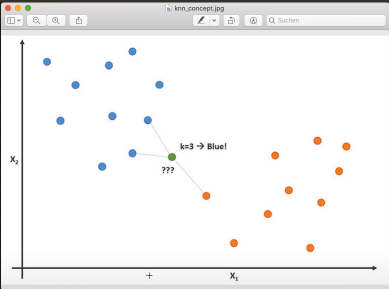

Here we have two classes the blue class and the orange class and we have feature vectors with two dimensions. We have x1 and x2 on axes. We have some training samples and then for each new sample that we want to classify we calculate the distance of this sample (green dot) to each of the training samples and then we have a look at the nearest neighbors.

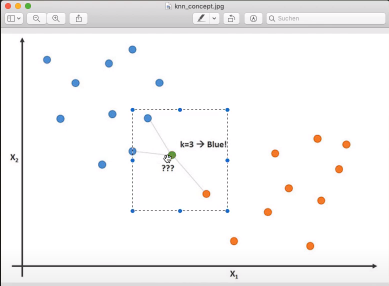

In this case we have a look at three nearest neighbors. Then we choose or predict the label based n the most common class labels. We have two blue classes and one orange class so our new sample (green dot) will be a blue class and this is the whole concept of the KNN.

## Euclidean distance

### Two dimensions

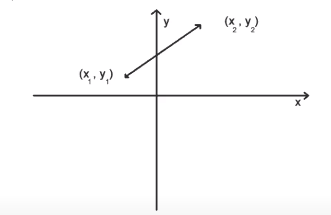

$ d = \sqrt{(x_{2} - x_{1})^{2} + (y_{2} - y_{1})^{2}}$

### Notes

In a 2d example the Euclidean distance of two points is defined as the square root over nad then we have for each feature vector component we have squared difference so we have $(x_{2} - x_{1})^{2} + (y_{2} - y_{1})^{2}$ . This is the Euclidean distance in a 2d case.

### General case

$\sqrt{\sum_{i=0}^{n}(q_{i} - p_{i})^{2}}$

### Notes

In general case Euclidean distance is the square root over the sum from i=0 to n where n is the number of dimensions and then we have the sum over each component. For each component we calculate the squared distance or the squared difference.

In [11]:
import numpy as np
from collections import Counter
# global funcion for calculating euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
        
    def _predict(self, x):
        # compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # get k nearest samples, labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        # most_common returns a list of tuples with most common items and numbers of occurrences
        return most_common[0][0]
        

Shape of the collection:  (120, 4)
First sample:  [5.1 2.5 3.  1.1]
Shape of the training labels:  (120,)
Training labels:  [1 2 0 2 1 0 0 0 0 1 0 1 0 2 2 0 2 2 2 2 0 2 2 1 1 1 1 1 1 0 0 2 2 2 0 0 0
 2 1 2 2 1 0 2 0 2 0 1 1 0 1 0 2 2 2 1 0 0 2 1 1 0 1 2 1 1 1 0 0 0 1 1 0 2
 1 2 2 1 0 1 2 0 0 2 2 1 1 2 0 1 2 2 2 1 0 0 0 0 2 1 2 0 0 1 1 2 1 1 2 2 2
 0 2 0 0 2 2 1 0 0]


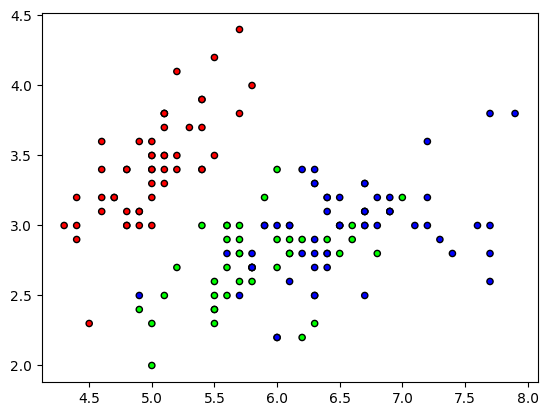

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 120 samples with 4 features for each sample
print('Shape of the collection: ', X_train.shape)
print('First sample: ', X_train[0])

# training labels, one dimension row vector
print('Shape of the training labels: ', y_train.shape)
print('Training labels: ', y_train)

plt.figure()
# plotting only first two features -> 2d case
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [14]:
# classifier
# Usually, we want to use an odd number as neighbors.
clf = KNN(k=3)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# accuracy
acc = np.sum(predictions == y_test) / len(y_test)

print('Accuracy: ', acc)

Accuracy:  1.0


In [15]:
# classifier
# usually, we want to use an odd number as neighbors.
clf = KNN(k=5)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# accuracy
acc = np.sum(predictions == y_test) / len(y_test)

print('Accuracy: ', acc)

Accuracy:  0.9666666666666667
